# 모델 저장하기

## torch.save( )
- 학습의 결과를 저장하기 위한 함수
- 모델 형태와 파라미터를 저장
- pt의 확장자를 사용해서 저장

### 파라미터만 저장
- model.state_dict : 모델의 파라미터 표시
- torch.save(model.state_dict, 경로+파일명)

### 모델 architecture와 함께  저장
- torch.save(model, 경로+파일명)

### 모델 파라미터만 load
- new_model = TheModelClass() : 불러올 모델과 같은 형태의 모델 생성
- new_model.load_state_dict(torch.load(경로+파일명)

### 모델 architecture와 함께 load
- new_model = torch.load(경로+파일명)


- summary(model, (입력데이터 크기)) : 입력데이터 크기에 따른 파라미터를 보기좋게 보여줌
    - from torchsummary import summary

# 모델 체크포인트 만들기

## checkpoints
- 학습의 중간 결과를 저장
- earlystopping 기법 사용시 이전 학습의 결과물을 저장
- loss와 metric값을 지속적으로 확인 저장
- 일반적으로 epoch,loss,metric을 함께 저장하여 확인

In [ ]:
torch.save({ # 모델의 정보를 epoch과 함께 저장해준다
'epoch': e,  # 모든 내용을 딕셔너리 형태로 저장 
'model_state_dict': model.state_dict(),
'optimizer_state_dict': optimizer.state_dict(),
'loss': epoch_loss,
},
f"saved/checkpoint_model_{e}_{epoch_loss/len(dataloader)}_{epoch_acc/len(dataloader)}.pt" # 파일명에 표시해주면 유용

# 불러오기
checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

# 전이학습

## transfer learning 
- 다른 데이터셋으로 만든 모델을 현재 데이터에 적용
- backbone architecture가 잘 학습된 모델에서 일부분만 변경하여 학습

## Freezing 
- transfer learning시 pretrained model의 파라미터 일부분을 그대로 사용하기 위해 frozen시킴

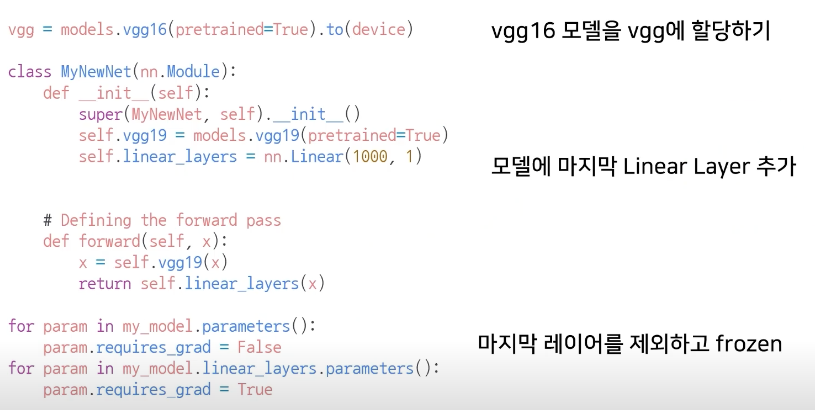

- requires_grad = True인 부분만 재학습이 됨 (False : Freezing)
